In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
#%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (7.0, 5.0)

#import matplotlib as mpl
#mpl.rc('text', usetex = True)
#mpl.rc('font', family = 'serif')

Populating the interactive namespace from numpy and matplotlib


In [2]:
solid = pickle.load( open( "solid.p", "rb" ) )
liquid = pickle.load( open( "liquid.p", "rb" ) )
gas = pickle.load( open( "gas.p", "rb" ) )
r = np.loadtxt('r.txt')
g_solid = np.loadtxt('g_solid')
g_liquid = np.loadtxt('g_liquid')
g_gas = np.loadtxt('g_gas')

# Solid

In [3]:
solid

{'K': 6.5805077942312134e-05,
 'K_e': 6.7455257783960872e-08,
 'P': 0.39948168504536807,
 'P_e': 0.035751849396769966,
 'T': 0.51648253174371284,
 'T_e': 0.00051977001464209029,
 'U': -0.00059518222510185478,
 'U_e': 6.0546283551514613e-08}

In [4]:
# compressibility factor:
P = solid['P']
P_e = solid['P_e']
T = solid['T']
T_e = solid['T_e']
rho = 1.2

Z = P/(rho*T)
Z_e = (1/(rho*T))*np.sqrt(P_e**2 + ((P/T)**2)*(T_e**2))
print(Z,Z_e)

0.644555011533 0.057688478444


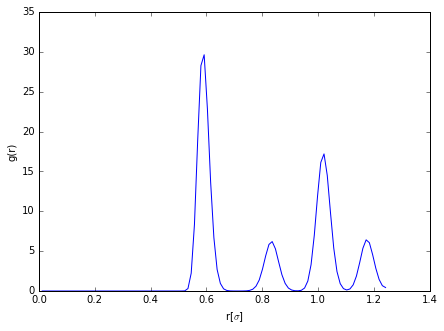

In [5]:
# correlation function:
plt.plot(r, g_solid, color='blue', label='solid')
plt.axis(ymax=35)
plt.ylabel('g(r)')
plt.xlabel('r[$\sigma$]')
#plt.legend()

plt.savefig('correlation_solid.png')
plt.show()

# Liquid

In [6]:
liquid

{'K': 1.4398593363287582,
 'K_e': 0.0015338654512266755,
 'P': 0.80391409596720387,
 'P_e': 0.018661026086573555,
 'T': 0.96887731042682801,
 'T_e': 0.00097502081124792458,
 'U': -5.3566356172582781,
 'U_e': 0.0015099520159596487}

In [7]:
# compute compressibility factor:
P = liquid['P']
P_e = liquid['P_e']
T = liquid['T']
T_e = liquid['T_e']
rho = 0.8

Z = P/(rho*T)
Z_e = (1/(rho*T))*np.sqrt(P_e**2 + ((P/T)**2)*(T_e**2))
print(Z,Z_e)

1.03717220864 0.0240981935946


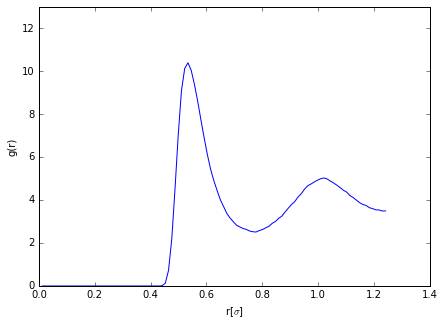

In [8]:
# correlation function
plt.plot(r, g_liquid, color='blue', label='liquid')
plt.axis(ymax=13)
plt.ylabel('g(r)')
plt.xlabel('r[$\sigma$]')
#plt.legend()

plt.savefig('correlation_liquid.png')
plt.show()

# Gas

In [9]:
gas

{'K': 4.5257923772286031,
 'K_e': 0.0022416387668520413,
 'P': 0.9258859819198717,
 'P_e': 0.0102652636919601,
 'T': 3.0453930014996207,
 'T_e': 0.0015265947554271558,
 'U': -1.7057615114336973,
 'U_e': 0.0025785842022445181}

In [10]:
# compressibility factor:
P = gas['P']
P_e = gas['P_e']
T = gas['T']
T_e = gas['T_e']
rho = 0.3

Z = P/(rho*T)
Z_e = (1/(rho*T))*np.sqrt(P_e**2 + ((P/T)**2)*(T_e**2))
print(Z,Z_e)

1.01342802222 0.011247317672


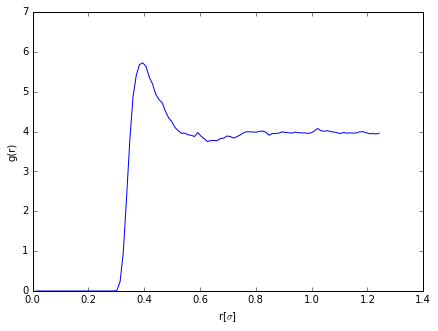

In [11]:
# correlation function
plt.plot(r, g_gas, color='blue', label='gas')
plt.axis(ymax=7)
plt.ylabel('g(r)')
plt.xlabel('r[$\sigma$]')
#plt.legend()

plt.savefig('correlation_gas.png')
plt.show()

# Methods

In [12]:
methods = pickle.load( open( "methods.p", "rb" ) )

In [13]:
methods

{'K': 1.4138221476771078,
 'K_e': 0.0022357676003407841,
 'P': 0.70334157629238381,
 'P_e': 0.02206854853415981,
 'T': 0.95135695918459573,
 'T_e': 0.0016640829532877991,
 'U': -5.9164277421256992,
 'U_e': 0.0022814106477799709}

In [14]:
# compressibility factor:
P = methods['P']
P_e = methods['P_e']
T = methods['T']
T_e = methods['T_e']
rho = 0.3

Z = P/(rho*T)
Z_e = (1/(rho*T))*np.sqrt(P_e**2 + ((P/T)**2)*(T_e**2))
print(Z,Z_e)

2.46434516334 0.0774431147565


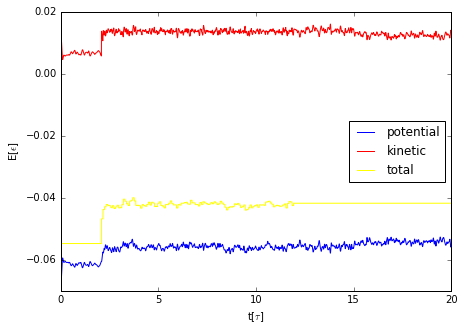

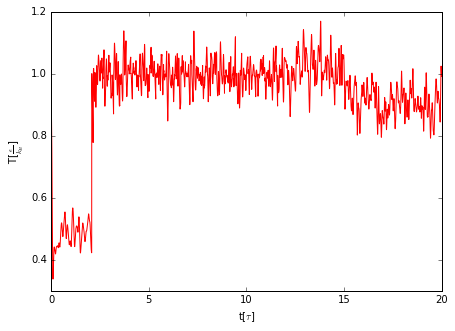

In [64]:
# show energy conservation and rescaling
t = np.loadtxt('raw_time_methods')
U_t = np.loadtxt('raw_U_methods')
K_t = np.loadtxt('raw_K_methods')
E_t = U_t + K_t
T_t = np.loadtxt('raw_T_methods')

plt.figure()
plt.plot(t, U_t, color = 'blue', label = 'potential')
plt.plot(t, K_t, color = 'red', label = 'kinetic')
plt.plot(t, E_t, color = 'yellow', label = 'total')
plt.legend(loc='center right')
plt.xlabel(r't[$\tau$]')
plt.ylabel('E[$\epsilon$]')
#plt.axis(xmax=0.4)
plt.savefig('energy_methods.png')

plt.figure()
plt.plot(t, T_t, color = 'red')
plt.xlabel(r't[$\tau$]')
plt.ylabel(r'T[$\frac{\epsilon}{k_B}$]')


plt.savefig('temperature_methods.png')
plt.show()